# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

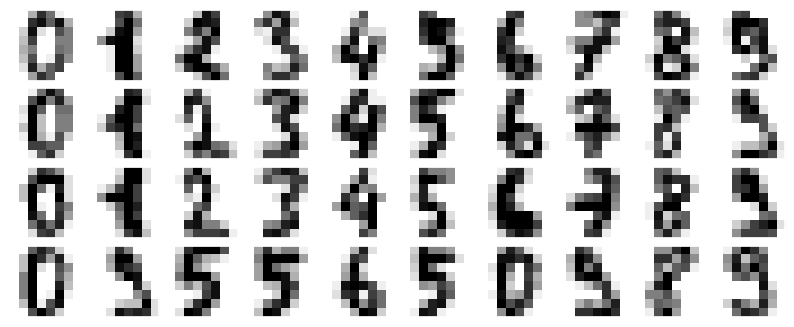

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Cell 3

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to retain 80% of the variance
pca = PCA(0.80)
X_reduced = pca.fit_transform(digits.data)
y = digits.target

print(f"Original shape: {digits.data.shape}")
print(f"Reduced shape: {X_reduced.shape}")


Original shape: (1797, 64)
Reduced shape: (1797, 13)


Cell 4

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y)


Cell 5

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, uniform

# Common parameters
param_distributions = {
    'C': uniform(1, 100),
}

# Additional parameters for specific kernels
param_distributions_rbf = param_distributions.copy()
param_distributions_rbf['gamma'] = expon(scale=0.1)

param_distributions_poly = param_distributions.copy()
param_distributions_poly['degree'] = [2, 3, 4, 5]


Cell 6

In [12]:
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly')


Cell 7

In [13]:
# Linear Kernel
random_search_linear = RandomizedSearchCV(
    svc_linear, param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_search_linear.fit(X_train, y_train)

# RBF Kernel
random_search_rbf = RandomizedSearchCV(
    svc_rbf, param_distributions=param_distributions_rbf, n_iter=10, cv=5, random_state=42)
random_search_rbf.fit(X_train, y_train)

# Polynomial Kernel
random_search_poly = RandomizedSearchCV(
    svc_poly, param_distributions=param_distributions_poly, n_iter=10, cv=5, random_state=42)
random_search_poly.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(kernel='poly'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000183D8A9AC50>,
                                        'degree': [2, 3, 4, 5]},
                   random_state=42)

Cell 8

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Linear Kernel
y_pred_linear = random_search_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# RBF Kernel
y_pred_rbf = random_search_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Polynomial Kernel
y_pred_poly = random_search_poly.predict(X_test)
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))


Linear Kernel Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.86      1.00      0.92        36
           2       0.97      1.00      0.99        35
           3       0.95      0.97      0.96        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.96      0.74      0.84        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.96      0.95       360

RBF Kernel Accuracy: 0.8722222222222222
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       1.00      0.89      0.94      

Cell 9

In [15]:
from sklearn.model_selection import cross_val_score

# Linear Kernel
cv_scores_linear = cross_val_score(
    random_search_linear.best_estimator_, X_reduced, y, cv=5)
print("Linear Kernel CV Accuracy:", np.mean(cv_scores_linear))

# RBF Kernel
cv_scores_rbf = cross_val_score(
    random_search_rbf.best_estimator_, X_reduced, y, cv=5)
print("RBF Kernel CV Accuracy:", np.mean(cv_scores_rbf))

# Polynomial Kernel
cv_scores_poly = cross_val_score(
    random_search_poly.best_estimator_, X_reduced, y, cv=5)
print("Polynomial Kernel CV Accuracy:", np.mean(cv_scores_poly))


Linear Kernel CV Accuracy: 0.9193175487465182
RBF Kernel CV Accuracy: 0.7579959764778705
Polynomial Kernel CV Accuracy: 0.9516109563602599


Cell 10

In [16]:
results = {
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_rbf),
        accuracy_score(y_test, y_pred_poly)
    ],
    'CV Accuracy': [
        np.mean(cv_scores_linear),
        np.mean(cv_scores_rbf),
        np.mean(cv_scores_poly)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


       Kernel  Test Accuracy  CV Accuracy
0      Linear       0.955556     0.919318
1         RBF       0.872222     0.757996
2  Polynomial       0.991667     0.951611
